# Проект: Статистический анализ данных

## Описание проекта

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

* без подписки
  * абонентская плата отсутствует;
  * стоимость одной минуты поездки — 8 рублей;
  * стоимость старта (начала поездки) — 50 рублей;
* с подпиской Ultra
  * абонентская плата — 199 рублей в месяц;
  * стоимость одной минуты поездки — 6 рублей;
  * стоимость старта — бесплатно.

## Описание данных

1. Пользователи — users_go.csv:
  * user_id — уникальный идентификатор пользователя
  * name — имя пользователя
  * age — возраст
  * city — город
  * subscription_type — тип подписки (free, ultra)
  
  
2. Поездки — rides_go.csv
   * user_id — уникальный идентификатор пользователя
   * distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
   * duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
   * date — дата совершения поездки
   
   
3. Подписки — subscriptions_go.csv
   * subscription_type — тип подписки
   * minute_price — стоимость одной минуты поездки по данной подписке
   * start_ride_price — стоимость начала поездки
   * subscription_fee — стоимость ежемесячного платежа

## Импортируем данные

### Импорт библиотек

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats as st
from math import factorial
from scipy.stats import binom, norm
from math import sqrt

### Загрузка данных

In [122]:
# создаем датафрей для файла'Пользователи'
try: 
    data_users = pd.read_csv('/datasets/users_go.csv')
except:
    data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
# создаем датафрей для файла'Поездки'
try:
    data_rides = pd.read_csv('/datasets/rides_go.csv')
except:
    data_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
# создаем датафрей для файла'подписки'
try:
    data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    data_subscriptions = pd.read_csv('https://code.s3.yandex.net//datasets/subscriptions_go.csv')

### Ознакомление с данными

In [124]:
#данные по пользователям 
display(data_users.head())
data_users.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


* Название и типы столбцов: user_id - Int64, name - object, age - int64, city - object,	subscription_type - object
* Пропущенных значений не обнаружено
* Всего строк: 1565, объем памяти: 61.3+ KB

In [128]:
#данные по поездкам
display(data_rides.head())
data_rides.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


* Название столбцов: user_id - int64, distance - float64, duration - float64,	date - object 
* Столбец date - содержит дату, а имеет тип object, необходимо изменить тип данных на datetime64[ns]
* Пропущенных значений не обнаружено
* Всего строк: 18068, объем памяти: 564.8+ KB

In [131]:
#данные по подпискам
display(data_subscriptions.head())
data_subscriptions.info()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


* Название столбцов: subscription_type - object, minute_price - int64, start_ride_price - int64, subscription_fee - int64
* Пропущенных значений не обнаружено
* Всего строк: 2, объем памяти: 192.0+ bytes

## Предобработка данных

### Обработка типов данных

In [136]:
# приведем столбец date к типу datetime64[ns]
data_rides['date'] = data_rides['date'].astype('datetime64[ns]')

### Создаем новый столбец 

In [139]:
# Задаем периодичность данных по годам
data_rides['period'] = data_rides['date'].dt.year

In [141]:
# Проверяем за какой период по годам данные
data_rides['period'].unique()

array([2021])

*Данные за 2021 год*

In [144]:
#создаем столбец с месяцами
data_rides['month'] = data_rides['date'].dt.month

In [146]:
#проверяем результат
data_rides.head()

,user_id,distance,duration,date,period,month
0,1,4409.919140,25.599769,2021-01-01,2021,1
1,1,2617.592153,15.816871,2021-01-18,2021,1
2,1,754.159807,6.232113,2021-04-20,2021,4
3,1,2694.783254,18.511000,2021-08-11,2021,8
4,1,4028.687306,26.265803,2021-08-28,2021,8


### Проверяем пропуски и дубликаты

In [149]:
# Проверяем датафрейм пользователи на явные дубликаты
data_users.duplicated().sum()

31

In [150]:
#удаляем дубликаты
data_users = data_users.drop_duplicates()

In [151]:
# Проверяем столбец пользователи на явные дубликаты
data_users.duplicated().sum()

0

Дубликаты из data_users удалены

In [154]:
# Проверяем датафрейм поездки на явные дубликаты
data_rides.duplicated().sum()

0

В датафрейме дубликаты не обнаружены

* В датафрейме data_subscriptions, всего 2 строки, мы видим, что они не повторяются 
* Пропусков в данных нет, это видно при обзоре данных

## Исследовательский анализ данных

### Частота встречаемости городов

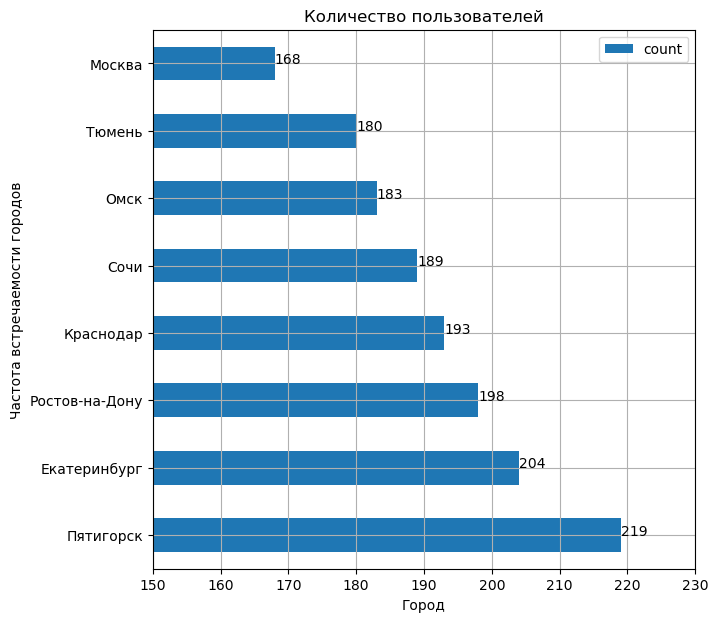

In [159]:
city_counts = data_users['city'].value_counts()
city_counts.plot(kind='barh', figsize=(7, 7), grid=True)
for index, value in enumerate(city_counts):
    plt.text(value, index, str(value))
plt.xlim(150, 230)
plt.title("Количество пользователей")
plt.xlabel("Город")
plt.ylabel("Частота встречаемости городов")
plt.legend()
plt.show()

*Мы наблюдаем, что самое большое количество пользователей в Пятигорске, почти 220, меньше всего пользователей в Москве, почти 170*

### Cоотношение пользователей с подпиской и без подписки

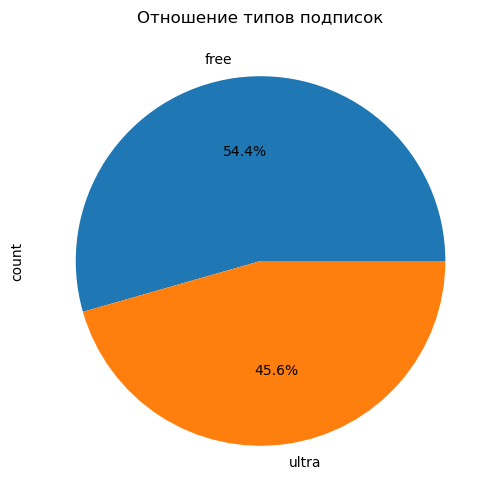

In [164]:
data_users['subscription_type'].value_counts().plot(y='user_id', kind='pie', autopct='%1.1f%%', figsize=(6, 6), grid=True)
plt.title("Отношение типов подписок")
plt.show()

*Мы видим, что количество пользователей без подписки, больше, чем количество пользователей с подпиской, на 8.8%*

### Возраст пользователей

**Так как мы имее большоее количество уникальных возрастов, разделим их на категории**

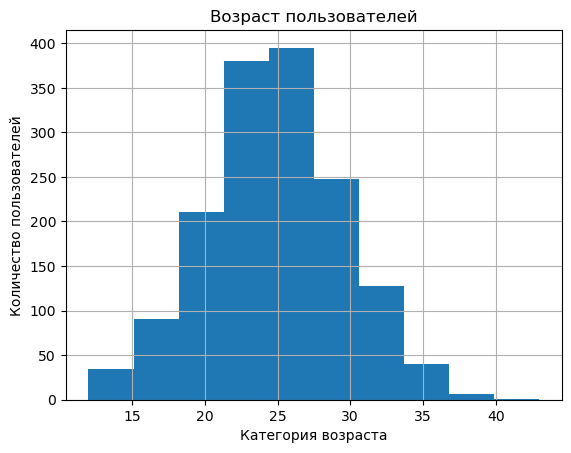

In [168]:
data_users['age'].hist()
plt.title("Возраст пользователей")
plt.xlabel("Категория возраста")
plt.ylabel("Количество пользователей")
plt.show()

**Больше всего пользователей в возрасте около 25 лет**

In [170]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

* Среднее значение по всем пользователям, чуть менее 25 лет
* Лишь 25% пользователей младше 22 лет
* 50% пользователей проезжают около 25 лет
* 25% старше 28 лет
* Самый молодой пользователь - 12 лет, самый взрослый пользователь - 43 года

### Расстояние, которое пользователь преодолел за одну поездку

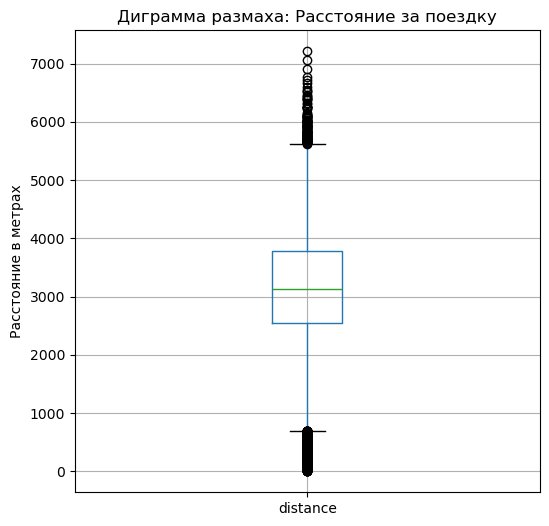

In [173]:
#Построим ящик с усами для определения выбросов
data_rides.boxplot(column='distance', figsize=(6, 6), grid=True);
plt.title('Диграмма размаха: Расстояние за поездку')
plt.ylabel("Расстояние в метрах")
plt.show()

**Выбросами можно считать значения более 1200 метров и 6600 метров**

*Изучим гистограмму расстояний пользователей*

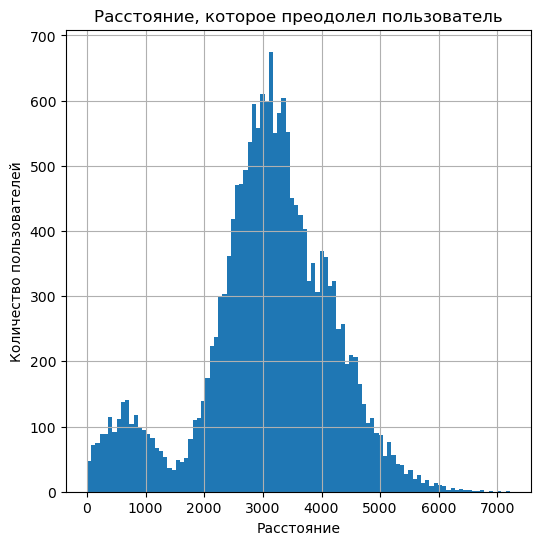

In [177]:
data_rides['distance'].hist(bins=100, figsize=(6, 6), grid=True);
plt.title("Расстояние, которое преодолел пользователь")
plt.xlabel("Расстояние")
plt.ylabel("Количество пользователей")
plt.show()

*Видим, что в среднем пользователи проезжают чуть больше 3000 метров. Также видим всплеск слева в районе 0 - 1000 км. Это может быть связано с несколькими факторами: "Разрядился самокат", "Пользователь не справился с транспортом", "Пользователь попал в ДТП".*

In [179]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

* Среднее значение по всем пользователям, примерно, 3070 метров
* Лишь 25% пользователей проезжают менее 2543 метров
* 50% пользователей проезжают около 3133 метров
* 25% пользователей проезжают менее 3776 метров
* Наименьшее расстояние поездки, примерно 0.85 метра, самая длинная поездка 7211 метров

### Продолжительность поездок

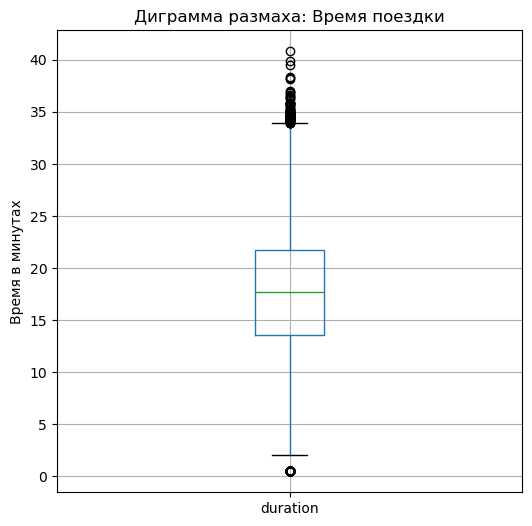

In [182]:
#Построим ящик с усами для определения выбросов
data_rides.boxplot(column='duration', figsize=(6, 6), grid=True)
plt.title('Диграмма размаха: Время поездки')
plt.ylabel("Время в минутах")
plt.show()

**Выбросами считать время менее 3 минут и более 38 минут**

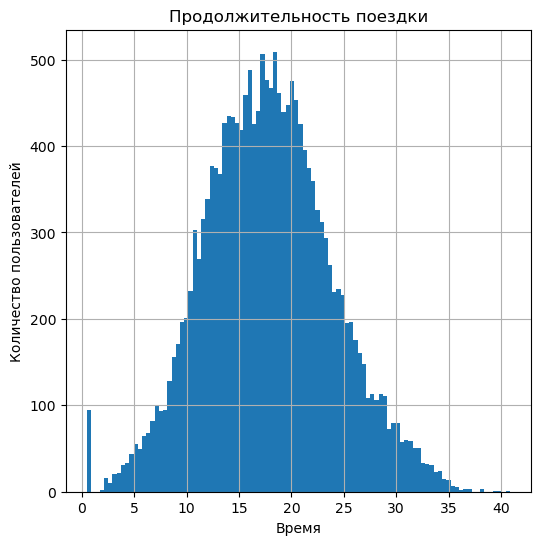

In [184]:
data_rides['duration'].hist(bins=100, figsize=(6, 6), grid=True);
plt.title("Продолжительность поездки")
plt.xlabel("Время")
plt.ylabel("Количество пользователей")
plt.show()

**Как правило поездка длится в районе 15 - 20 минут**

In [187]:
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

* Поездки длятся в среднем чуть менее 18 минут
* Лишь 25% пользователей проезжают менее 13,5 минут
* 50% пользователей проезжают около 17.5 минут
* 25% пользователей проезжают чуть менее 22 минуты
* Наименьшее время поездки, примерно 0,5 минуты, самая длительная поездка 40 минут

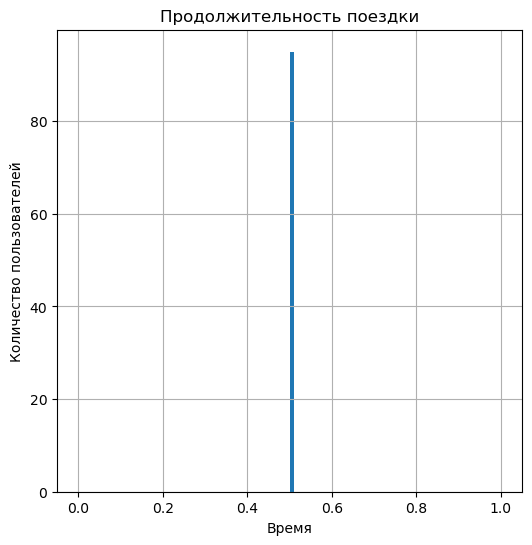

In [189]:
data_rides['duration'].hist(bins=100, range=(0, 1), figsize=(6, 6), grid=True);
plt.title("Продолжительность поездки")
plt.xlabel("Время")
plt.ylabel("Количество пользователей")
plt.show()

**Видим большой всплеск в размере 86 поездок продолжительностью полминуты**

*Проверим среднюю дистанцию пройденную за это время*

In [192]:
data_rides[data_rides['duration'] ==0.5].value_counts()

user_id  distance     duration  date        period  month
701      4196.445201  0.5       2021-08-31  2021    8        1
1224     4430.510768  0.5       2021-01-15  2021    1        1
1293     4704.878192  0.5       2021-02-13  2021    2        1
1287     5944.789947  0.5       2021-12-09  2021    12       1
1285     6316.574814  0.5       2021-09-25  2021    9        1
                                                            ..
937      4169.066800  0.5       2021-12-12  2021    12       1
931      6002.236438  0.5       2021-11-10  2021    11       1
928      4857.412920  0.5       2021-06-06  2021    6        1
922      4620.899239  0.5       2021-01-05  2021    1        1
1524     4103.998874  0.5       2021-06-18  2021    6        1
Name: count, Length: 95, dtype: int64

Мы наблюдаем, что данное время содержит в себе достаточно длинные отрезки дистанции, предположительно более, 4000 метров, проверим эту догадку

In [195]:
#Сортируем таблицу
filtered_data = data_rides[(data_rides['duration'] == 0.5) & (data_rides['distance'] >= 4000)]

In [196]:
#Смотрим информацию
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 6531 to 17909
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   95 non-null     int64         
 1   distance  95 non-null     float64       
 2   duration  95 non-null     float64       
 3   date      95 non-null     datetime64[ns]
 4   period    95 non-null     int32         
 5   month     95 non-null     int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1)
memory usage: 4.5 KB


**Отфильтровав таблицу, мы видим, что количество строк совпадает, соотвественно можно предположить, что периодически при привышении расстоянии более 4000 метров, таймер ломается и показывает полминуты общего пройденого времени**

## Объединение данных

### Создаем единый датафрейм

In [200]:
#объединяем data_users и data_rides
data = data_users.merge(data_rides, on='user_id', how='left')

In [201]:
#объединяем получившийся датафрейм с data_subscriptions
data = data.merge(data_subscriptions, on='subscription_type', how='left')

In [202]:
#выведем первые пять строк объединенного датафрейма
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,period,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,2021,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,2021,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,2021,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,2021,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,2021,8,6,0,199


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   period             18068 non-null  int32         
 9   month              18068 non-null  int32         
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(5), object(

Данные перенесены корректно, пропусков и лишних записей не обнаружено, количество строк совпадает с количеством строк таблицы data_rides

**Мы получили объединенный датафрейм** 

### Создаем два датафрейма относительно категории

In [208]:
# Создаем датафрейм с подпиской ultra
data_ultra = data[data['subscription_type'] == 'ultra']

In [209]:
#Смотрим результат
data_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,period,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,2021,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,2021,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,2021,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,2021,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,2021,8,6,0,199


In [211]:
data_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 0 to 6499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   period             6500 non-null   int32         
 9   month              6500 non-null   int32         
 10  minute_price       6500 non-null   int64         
 11  start_ride_price   6500 non-null   int64         
 12  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(5), object(3)
memo

**Датафрейм ultra готов**

In [213]:
# Создаем датафрейм без подписки
data_free = data[data['subscription_type'] == 'free'].reset_index(drop=True)

In [214]:
#Смотрим результат
data_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,period,month,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,2021,1,8,50,0
1,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2021,2,8,50,0
2,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2021,2,8,50,0
3,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2021,2,8,50,0
4,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2021,2,8,50,0


In [215]:
data_free.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11568 entries, 0 to 11567
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   period             11568 non-null  int32         
 9   month              11568 non-null  int32         
 10  minute_price       11568 non-null  int64         
 11  start_ride_price   11568 non-null  int64         
 12  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(5), object(

**Количество строк после разъединения не изменилось, пропусков не появилось, разделенеие корректно**

### Графики времени поездок и расстоянии для пользователей отдельных категорий

*Гистограмма времени поездок для клиентов*

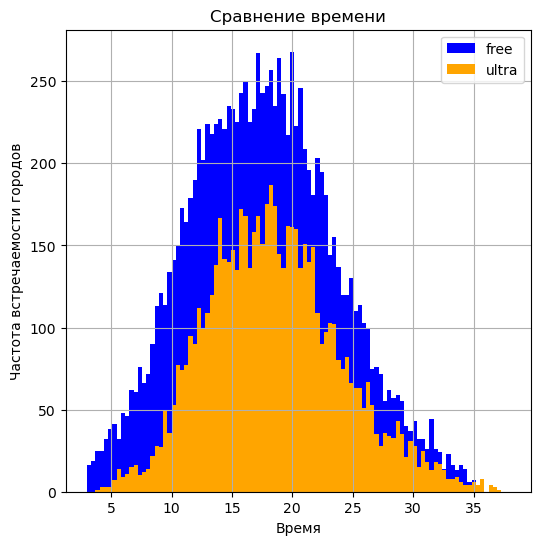

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [219]:
data_free['duration'].hist(bins=100, range=(3, 38), color='blue', figsize=(6, 6), grid=True, label='free');
data_ultra['duration'].hist(bins=100, range=(3, 38), color='orange', figsize=(6, 6), grid=True, label='ultra');

plt.title("Сравнение времени")
plt.xlabel("Время")
plt.ylabel("Частота встречаемости городов")
plt.legend()
plt.show()
data_free['duration'].describe()

In [220]:
data_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

* В среднем клиенты без подписки тратят на поездки около 17 минут, а клиенты с подпиской 18.5
* 25% пользователей без подписок проезжают чуть меньше 13 мину, а 25% с подписками около 14.5 минут
* 50% пользователей без подписок проезжают около 17 минут, 50% с подписками около 18 минут
* 25% пользователей без подписок проезжают около 21.5 минуты, 25% пользователей с подписками проезжают чуть менее 22 минут
**Так как наименьшее время поездки 0.5 минуты у категории free, то можно утверждать, то ошибка обнаруженная ранее, происходит только с данным типом клиентов**

**Короткие поездки чаще встречаются у клиентов без подписки, длительных поездок у них тоже много, но средняя длительность поездки между двумя группами более минуты, в пользу категории ultra**

*Гистограмма расстояния поездок для клиентов с подпиской*

**В среднем клиенты c подпиской тратят на поездки 18 минут**

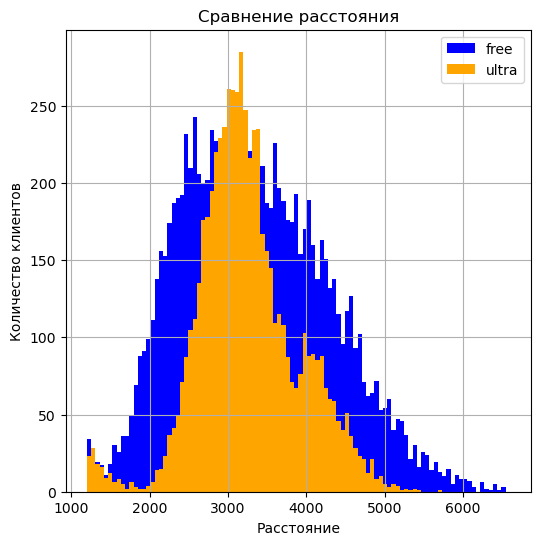

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [224]:
data_free['distance'].hist(bins=100, range=(1200, 6600), color='blue', figsize=(6, 6), grid=True, label='free');
data_ultra['distance'].hist(bins=100, range=(1200, 6600), color='orange', figsize=(6, 6), grid=True, label='ultra');

plt.title("Сравнение расстояния")
plt.xlabel("Расстояние")
plt.ylabel("Количество клиентов")
plt.legend()
plt.show()
data_free['distance'].describe()

In [225]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

* В среднем клиенты без подписки проезжают 3045 метров, а клиенты с подпиской 3115
* 25% пользователей без подписок проезжают чуть меньше 2366 метров, а 25% с подписками около 2785
* 50% пользователей без подписок проезжают около 3114 метров, 50% с подписками около 3148 
* 25% пользователей без подписок проезжают около 3905 метров, 25% пользователей с подписками проезжают чуть 3560


**Клиенты с подпиской ultra и free в среднем проезжают примерно одинаковое расстояние, но 25% пользователей с free в срднем проезжают 3905 метров, почти на 400 метров дальше, чем клиенты с подпиской, но при этом 25% пользователей с free проезжают 2366, что на 400 метров меньше, чем проезжают 25% пользователей с подпиской.**

## Подсчёт выручки

### Создаем датафрейм с данными о поездках помесячно

In [229]:
#Округляем длительность поездок
data['duration'] = np.ceil(data['duration']) 

In [230]:
data_month = data.pivot_table(index=['user_id', 'name', 'month', 'subscription_type'], \
                      values=['distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee'],\
                              aggfunc={'distance':['sum', 'count'], 'duration':'sum',\
                                                    'minute_price':'mean', 'start_ride_price':'mean', 'subscription_fee':'mean'})
                                                                
data_month.columns = ['number_trips', 'total_distance', 'total_duration', 'minute_price', 'start_ride_price', 'subscription_fee']

data_month = data_month.reset_index()

# Смотрим результат
data_month.head()

,user_id,name,month,subscription_type,number_trips,total_distance,total_duration,minute_price,start_ride_price,subscription_fee
0,1,Кира,1,ultra,2,7027.511294,42.0,6.0,0.0,199.0
1,1,Кира,4,ultra,1,754.159807,7.0,6.0,0.0,199.0
2,1,Кира,8,ultra,2,6723.470560,46.0,6.0,0.0,199.0
3,1,Кира,10,ultra,2,5809.911100,32.0,6.0,0.0,199.0
4,1,Кира,11,ultra,3,7003.499363,56.0,6.0,0.0,199.0


In [231]:
data_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            11331 non-null  int64  
 1   name               11331 non-null  object 
 2   month              11331 non-null  int32  
 3   subscription_type  11331 non-null  object 
 4   number_trips       11331 non-null  int64  
 5   total_distance     11331 non-null  float64
 6   total_duration     11331 non-null  float64
 7   minute_price       11331 non-null  float64
 8   start_ride_price   11331 non-null  float64
 9   subscription_fee   11331 non-null  float64
dtypes: float64(5), int32(1), int64(2), object(2)
memory usage: 841.1+ KB


**В получившимся датафрейме 11331 строка, пропусков нет**

### Добавляем столбецы с помесячной выручкой

*Создаем стобец с помесячной выручкой для клиентов без подписки*

In [235]:
# Расчитываем помесячную формулу выручки без подписки
data_month['revenue'] = data_month['minute_price']*data_month['total_duration']+data_month['start_ride_price']*data_month['number_trips']+data_month['subscription_fee']

In [236]:
#Смотрим результат
data_month.head()

,user_id,name,month,subscription_type,number_trips,total_distance,total_duration,minute_price,start_ride_price,subscription_fee,revenue
0,1,Кира,1,ultra,2,7027.511294,42.0,6.0,0.0,199.0,451.0
1,1,Кира,4,ultra,1,754.159807,7.0,6.0,0.0,199.0,241.0
2,1,Кира,8,ultra,2,6723.470560,46.0,6.0,0.0,199.0,475.0
3,1,Кира,10,ultra,2,5809.911100,32.0,6.0,0.0,199.0,391.0
4,1,Кира,11,ultra,3,7003.499363,56.0,6.0,0.0,199.0,535.0


In [237]:
data_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            11331 non-null  int64  
 1   name               11331 non-null  object 
 2   month              11331 non-null  int32  
 3   subscription_type  11331 non-null  object 
 4   number_trips       11331 non-null  int64  
 5   total_distance     11331 non-null  float64
 6   total_duration     11331 non-null  float64
 7   minute_price       11331 non-null  float64
 8   start_ride_price   11331 non-null  float64
 9   subscription_fee   11331 non-null  float64
 10  revenue            11331 non-null  float64
dtypes: float64(6), int32(1), int64(2), object(2)
memory usage: 929.6+ KB


**Столбец добавлен**

## Проверка гипотез

### Гипотеза 1

*Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.*

**Н0: Пользователи с подпиской тратят столько же времени сколько пользователи без подписки**


**Н1: Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки**

* Проверяем альтернативную гипотезу, как одностороннюю гипотезу для средних двух генеральных совокупностей

In [243]:
alpha = 0.05

results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater', equal_var=False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


**При p-value = 1.28 мы отвергаем нулевую гипотезу. При текущих данных можно утверждать, что пользователи с подпиской тратят больше времени на поездки. Пользователи с подпиской более выгодны для компании.**

### Гипотеза 2

*Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.*

**Н0: Пользователи с подпиской проезжают 3130**


**Н1: Пользователи с подпиской проезжают более 3130**
* Проверяем альтернативную гипотезу, как одностороннюю гипотезу

In [247]:
alpha = 0.05

max_distance = 3130

results = st.ttest_1samp(
    data_ultra['distance'], 
    max_distance,
      alternative='greater')

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-value: 0.9195368847849785
Не отвергаем нулевую гипотезу


**При p-value = 0.9195368847849785 у нас нет оснований отвергать нулевую гипотезу. Из чего следует, что клиенты не проезжают более 3130 метров. Пользователи с подпиской в среднем не превышают оптимальное расстояние с точки зрения износостойкости.**

### Гипотеза 3

*Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.*

**Н0: Ежемесячная выручка от пользователей с подпиской такая же как от пользователей без подписки**


**Н1: Пользователи с подпиской приносят ежемесячно больше денег, чем пользователи без подписки**

* Проверяем альтернативную гипотезу, как одностороннюю гипотезу для средних двух генеральных совокупностей

In [252]:
alpha = 0.05

results = st.ttest_ind(data_month[data_month['subscription_type'] == 'ultra']['revenue'], data_month[data_month['subscription_type'] == 'free']['revenue'], alternative='greater', equal_var=False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 8.874140893976874e-40
Отвергаем нулевую гипотезу


**При p-value = 1.188 мы отвергаем нулевую гипотезу. Имея текущие данные мы можем утверждать, что пользователи с подпиской приносят больше денег, чем пользователи без подписки**

### Гипотеза 4

*Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?*

**Н0: Количество запросов в поддержку до обновления такое же, как и количество обращений после обновления сервера**


**Н1: Количество запросов в поддержку после обновления уменьшилось, относительно количества обращений до обновления**

* Для ответа на эту гипотезу мы бы использовали: 'Гипотезу о равенстве средних для зависимых (парных) выборок', потому что проверяем одну и ту же генеральную совокупность до изменения и после, у нас была выборка с исходным количеством обращений в поддержку, затем техническая команда обновила сервер и унас появилась выборка с количеством обращений после изменения

## Распределения

### Задание 1

 *Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.*


* Предположим, что для выполнения плана нам необходимо разослать минимум 1157 кодов, соответсвенно n = 1157
* При коневерссии в 10% p = 0.1
* Для невыполнения плана нам необходимо 99 промокодов, x = 99

In [260]:
n = 1157
p = 0.1

mu = n*p
sigma = sqrt(n * p * (1 - p))

distr = st.norm(mu, sigma)

x = 99

result = distr.cdf(x)

print(f'Результат применения кумулятивной функции: {result:.4f}')

Результат применения кумулятивной функции: 0.0509


**Из чего следует, что для выполнения плана на 95% нам необходимо разослать минимум 855 писем**

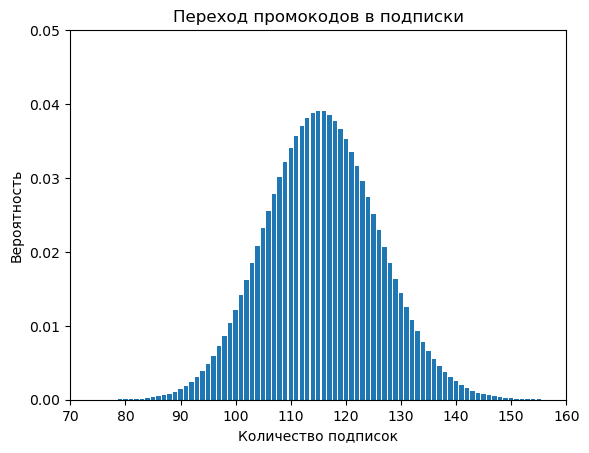

In [262]:
n = 1157
p = 0.1

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.bar(range(0, n+1), distr)
plt.title("Переход промокодов в подписки")
plt.xlabel("Количество подписок")
plt.ylabel("Вероятность")
plt.xlim(70, 160)
plt.ylim(0, 0.05)
plt.show()

**Построенный график имеет нормальное распределение, его математическое ожидание = 115, наиболее вероятное значение тоже находится в районе 115 подписок**  

### Задание 2

*Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.*

* Количество сообщений, которые нужно разослать - 1 000 000, соответсвенно n = 1 000 000
* Мы знаем, что уведомления открывают примерно - 40% получивших сообщения клиентов, соотвественно p = 0.4
* Нам необходимо узнать вероятность того, что уведомленомения откроют не более 399500 пользователей

In [268]:
# Задаем параметры биноминального распределения
n = 1000000
p = 0.4

# Расчитываем параметры нормально распределения
mu = n*p
sigma = sqrt(n * p * (1 - p))

distr = st.norm(mu, sigma) # Задаем нормальное распределение 

x = 399500 # Задаем количество уведомлений

result = distr.cdf(x) # Считаем вероятность исхода

# Выводим результат 
print(f"Вероятность того, что уведомление откроют не более {x} пользователей: {result:.4f}")

Вероятность того, что уведомление откроют не более 399500 пользователей: 0.1537


*Построим апроксимацию биноминального распределения нормальным*

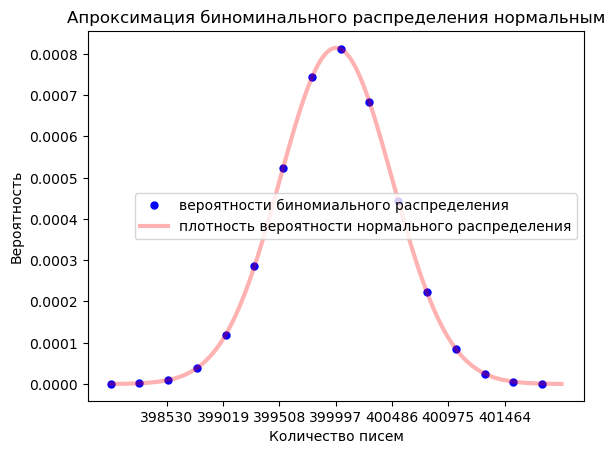

Заданное условие выполняется


In [270]:
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5, расставляем маркеры в интервале 250 
ax.plot(x[::250], binom.pmf(np.array(x)[::250], n, p), 'bo', ms=5, label='вероятности биномиального распределения')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 1000)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), int(sigma)))
ax.set_xticks(x_ticks)

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.title("Апроксимация биноминального распределения нормальным")
plt.xlabel("Количество писем")
plt.ylabel("Вероятность")
plt.show()

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Заданное условие выполняется')
else:
    print('Заданное условие не выполняется')

**Вероятность того, что сообщение откроют не более 399500 пользователей -- 15%, построив график апроксимации с шагом 250, мы можем заключить, что нормальное распределение совпадает с биноминальным**

## Вывод

*Мы получили данные и задачу на проверку гипотез, которые помогут сервису GoFast увеличить бизнес показатели.*

* **Полученный набор данных:**

1. Пользователи — users_go.csv:
  * user_id — уникальный идентификатор пользователя
  * name — имя пользователя
  * age — возраст
  * city — город
  * subscription_type — тип подписки (free, ultra)
  
  
2. Поездки — rides_go.csv
   * user_id — уникальный идентификатор пользователя
   * distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
   * duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
   * date — дата совершения поездки
   
   
3. Подписки — subscriptions_go.csv
   * subscription_type — тип подписки
   * minute_price — стоимость одной минуты поездки по данной подписке
   * start_ride_price — стоимость начала поездки
   * subscription_fee — стоимость ежемесячного платежа


* **Первым делом мы провели предобработку данных**  


* **Далее мы провели исследовательский анализа данных и пришли к выводам:**
1. Основные клиенты 25 лет, в среднем проезжают около 3070 метров, поездка длится чуть менее 18 минут
2. Клиенты без подписки тратят на поездки около 17 минут, проезжают около 3000 метров
3. Клиенты с подпиской едут около 18 минут, проезжают в среднем в районе 3100 метров


* **Также мы проверили гипотезы, которые нам предложили продакт менеджеры, их выводы:**
1. При текущих данных можно утверждать, что пользователи с подпиской тратят больше времени на поездки. Пользователи с подпиской более выгодны для компании
2. Пользователи с подпиской в среднем не превышают оптимальное расстояние с точки зрения износостойкости
3. Имея текущие данные мы можем утверждать, что пользователи с подпиской приносят больше денег, чем пользователи без подписки


* **Рекомендации:**
1. Стоит сделать упор на увеличение количества пользователей с подпиской, это можно сделать, например, предложив пакетные решения с увеличением скидки, относительно количества единовеременно оплаченых месяцев: "Подписка на 3 месяца", "Подписка на 6 месяцев", "Подписка на год". В разные месяцы клиенты тратят разное время на поездки, оплаченные месяцы, вероятно будут стимулировать клиентов ездить больше.
2. Для увеличения общего количества пользователей GoFast, можно сделать рассылку с промокодами на скидки для пользователей других продуктов от Яндекс.
3. Пользователей в Москве совсем мало, вероятнее всего это связано с развитым метро и большими расстояниями, которые приходится преодалевать среднему потенциальному клиенту, возможно для Москвичей стоит разработать отдельные условия и тарифы, либо отключить плату за старт совсем и посмотреть, какой результат прироста пользователей это даст и на основании него делать выводы о том, как удержать возросшую базу клиентов, если это сработает. 
